In [ ]:
!pip install triangle
!pip install ipywidgets
!pip install line_profiler

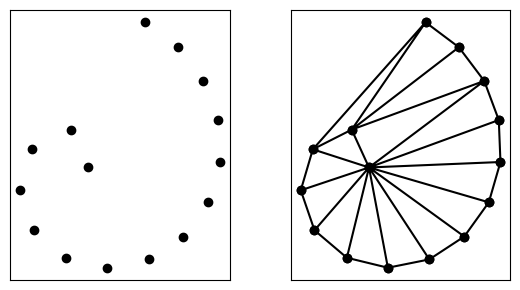

In [ ]:
import matplotlib.pyplot as plt

import triangle as tr

spiral = tr.get_data('spiral')
t = tr.triangulate(spiral)

tr.compare(plt, spiral, t)

plt.show()

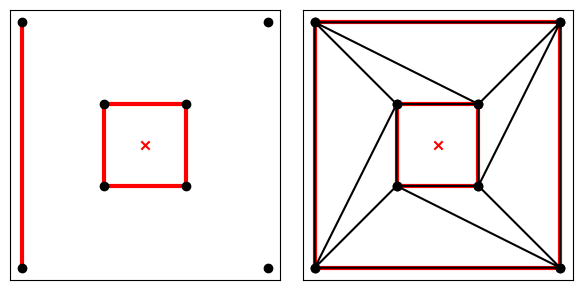

In [ ]:
import matplotlib.pyplot as plt

import triangle as tr

box = tr.get_data('box')
t = tr.triangulate(box, 'pc')

tr.compare(plt, box, t)
plt.show()

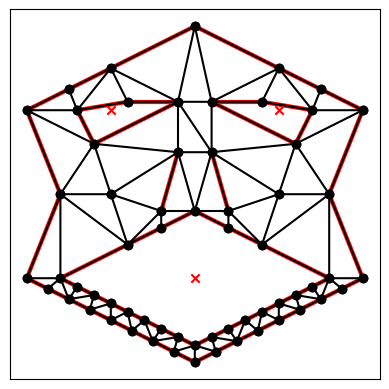

In [ ]:
import matplotlib.pyplot as plt

import triangle as tr

face = tr.get_data('face')
t = tr.triangulate(face, 'pq0D')
tr.plot(plt.axes(), **t)

plt.show()

The triangles for the polygon produced by the library:
[[0 5 7]
 [5 0 1]
 [6 7 5]
 [4 1 2]
 [1 4 5]
 [2 3 4]]


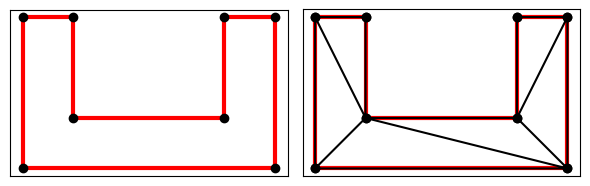

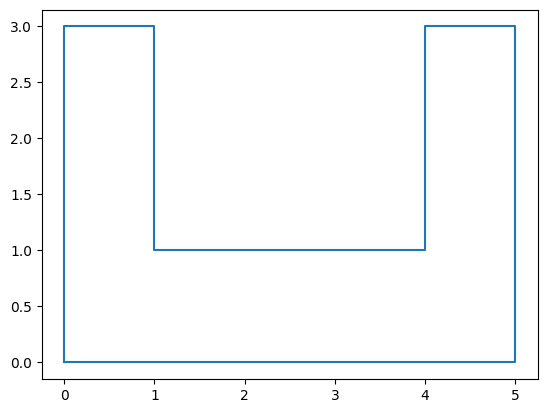

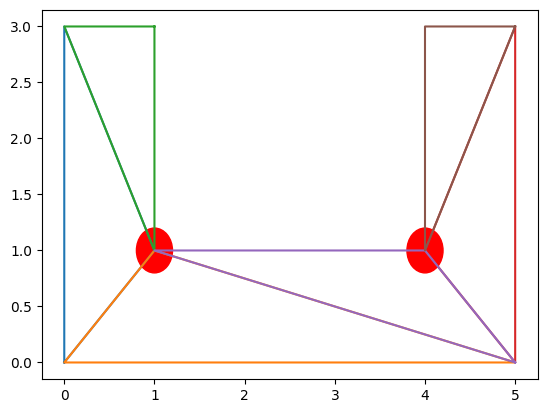

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import triangle as tr
from shapely.geometry import Polygon
polygon_points = np.array([
    [0, 0], [5,0], [5,3], [4,3],[4,1], [1, 1],[1,3],[0,3]])
N = polygon_points.shape[0]

# segments
i = np.arange(N)
seg = np.stack([i, i + 1], axis=1) % N
A = dict(vertices=np.array((polygon_points)),segments=seg)
B = tr.triangulate(A,'p')
# print(B)
triangles = (B['triangles'])
print("The triangles for the polygon produced by the library:")
print(triangles)
tr.compare(plt, A, B)
plt.show()
# And then you can plot them separately
original_polygon = Polygon(polygon_points)
x,y = original_polygon.exterior.xy
plt.plot(x,y)
plt.show()
# And to plot the triangles
for t in triangles:
    triangle_points = Polygon(polygon_points[t])
    x,y = triangle_points.exterior.xy
    plt.plot(x,y)
fig = plt.gcf()
ax = fig.gca()
# Now highlight some vertices (the locations of the guards)
for i in [4,5]:
  circle = plt.Circle(polygon_points[i], 0.2, color='r')
  ax.add_patch(circle)
plt.show()

In [ ]:
def knapsack(weights, values, capacity):
    n = len(weights)

    # Initialize a 2D DP array with zeros
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]

    # Fill the dp table
    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:
                # If the current item can be included, check the maximum value
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]

    # The maximum value is in dp[n][capacity]
    max_value = dp[n][capacity]

    # Backtrack to find the items included in the optimal solution
    items_included = []
    w = capacity
    for i in range(n, 0, -1):
        if max_value != dp[i - 1][w]:
            items_included.append(i - 1)
            w -= weights[i - 1]
            max_value -= values[i - 1]

    return dp[n][capacity], items_included

# Test the Knapsack function
weights = [2, 3, 4, 5]
values = [3, 4, 5, 6]
capacity = 5

max_value, items_included = knapsack(weights, values, capacity)
print(f"The maximum value that can be obtained: {max_value}")
print(f"Items included (indices): {items_included}")


The maximum value that can be obtained: 7
Items included (indices): [1, 0]


In [ ]:
class AVLTree:
    def __init__(self):
        self.root = None

    # Insert, delete, and balancing methods would go here...
    # For simplicity, we'll assume insertions are done here and the tree stays balanced.

    def insert(self, key, value):
        # Inserting into the AVL tree (simplified)
        pass

    def get(self, key):
        # Search method to retrieve value
        pass


In [ ]:
class HashTable:
    def __init__(self):
        self.table = {}

    def insert(self, key, value):
        self.table[key] = value

    def get(self, key):
        return self.table.get(key)


In [ ]:
%%writefile DSAP/bst_vs_rbt.py
# Comparing Binary Search Tree (BST) and Red-Black Tree (RBT)

import random
import time
import numpy as np
from dsap.searchtree.binary_search_tree import TreeMap  # BST
from dsap.searchtree.red_black_tree import RedBlackTreeMap  # RBT

# Function to insert elements into BST
def insert_in_bst(bst_map, elements):
    for element in elements:
        bst_map.__setitem__(element, element)

# Function to insert elements into RBT
def insert_in_rbt(rbt_map, elements):
    for element in elements:
        rbt_map.__setitem__(element, element)

if __name__ == "__main__":
    # Generate random elements to insert
    number_of_elements = 1024  # Default value for the number of elements
    elements = [random.randint(0, number_of_elements * 10) for _ in range(number_of_elements)]

    # Initialize BST and RBT
    bst_map = TreeMap()  # Binary Search Tree Map
    rbt_map = RedBlackTreeMap()  # Red-Black Tree Map

    # Measure time for BST insertion
    start_time = time.time()
    insert_in_bst(bst_map, elements)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time of insert_in_bst: {execution_time} seconds")

    # Measure time for RBT insertion
    start_time = time.time()
    insert_in_rbt(rbt_map, elements)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time of insert_in_rbt: {execution_time} seconds")

    # Measure time for BST lookup
    start_time = time.time()
    for element in elements:
        bst_map.__getitem__(element)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time to look up all the elements in the bst map: {execution_time} seconds")

    # Measure time for RBT lookup
    start_time = time.time()
    for element in elements:
        rbt_map.__getitem__(element)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time to look up all the elements in the rbt map: {execution_time} seconds")


Overwriting DSAP/bst_vs_rbt.py


In [ ]:
import os

# Create the directory if it doesn't exist
if not os.path.exists('DSAP'):
    os.makedirs('DSAP')


In [ ]:

!git clone https://github.com/goldwasser/DSAP.git

fatal: destination path 'DSAP' already exists and is not an empty directory.


#Binary Search Tree (BST) Implementation:

In [ ]:
import random
import string

class TreeNode:
    def __init__(self, key, value):
        self.left = None
        self.right = None
        self.key = key
        self.value = value

class BST:
    def __init__(self):
        self.root = None

    def insert(self, key, value):
        if self.root is None:
            self.root = TreeNode(key, value)
        else:
            self._insert(self.root, key, value)

    def _insert(self, node, key, value):
        if key < node.key:
            if node.left is None:
                node.left = TreeNode(key, value)
            else:
                self._insert(node.left, key, value)
        else:
            if node.right is None:
                node.right = TreeNode(key, value)
            else:
                self._insert(node.right, key, value)

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if node is None or node.key == key:
            return node
        if key < node.key:
            return self._search(node.left, key)
        return self._search(node.right, key)

    def __getitem__(self, key):
        node = self.search(key)
        if node:
            return node.value
        return None

    # For testing and visualization: Print tree structure
    def print_tree(self, node, indent="", position="Root"):
        if node:
            print(f"{indent}[{position}] (Key: {node.key}, Value: {node.value})")
            self.print_tree(node.left, indent + "    ", "Left")
            self.print_tree(node.right, indent + "    ", "Right")

# Function to generate random string
def random_string(length=5):
    letters = string.ascii_letters
    return ''.join(random.choice(letters) for i in range(length))

# Example usage
if __name__ == "__main__":
    # Create an instance of BST
    bst = BST()

    inserted_keys = []  # Store the inserted keys for later use in search

    # Insert some random nodes
    for _ in range(10):  # Insert 10 random nodes
        key = random.randint(1, 100)  # Random integer key between 1 and 100
        value = random_string()  # Random string value
        bst.insert(key, value)
        inserted_keys.append(key)  # Save the inserted key

    # Print the tree structure
    print("Binary Search Tree Structure:")
    bst.print_tree(bst.root)

    # Search for an inserted key to guarantee it exists
    search_key = random.choice(inserted_keys)  # Choose a key from the inserted keys
    print(f"\nSearching for key {search_key}:")
    print(f"Found: {bst[search_key]}")  # This should definitely return a value since we are searching for an inserted key

    # Optional: Try searching for a key that might not exist
    search_key_not_found = 999  # A key that is likely not in the tree
    print(f"\nSearching for key {search_key_not_found}:")
    print(f"Found: {bst[search_key_not_found]}")  # Should return None if key is not found


Binary Search Tree Structure:
[Root] (Key: 44, Value: cubeq)
    [Left] (Key: 20, Value: pkQAx)
        [Left] (Key: 17, Value: eluKF)
            [Left] (Key: 11, Value: TstOE)
                [Right] (Key: 13, Value: bOruk)
        [Right] (Key: 42, Value: ODvtR)
            [Left] (Key: 27, Value: vdidj)
                [Right] (Key: 34, Value: QWydM)
    [Right] (Key: 78, Value: cZpNy)
        [Right] (Key: 78, Value: HItuc)

Searching for key 44:
Found: cubeq

Searching for key 999:
Found: None


#Red-Black Tree (RBT) Implementation:

In [ ]:
import random
import string

class RedBlackTreeNode:
    def __init__(self, key, value, color='RED'):
        self.key = key
        self.value = value
        self.color = color
        self.left = None
        self.right = None
        self.parent = None

class RedBlackTree:
    def __init__(self):
        self.TNULL = RedBlackTreeNode(0, 0)  # Sentinel node for the leaves
        self.TNULL.color = 'BLACK'
        self.root = self.TNULL

    def insert(self, key, value):
        node = RedBlackTreeNode(key, value)
        node.parent = None
        node.key = key
        node.value = value
        node.left = self.TNULL
        node.right = self.TNULL
        node.color = 'RED'  # New nodes are always red

        # Perform binary search insertion
        parent = None
        current = self.root
        while current != self.TNULL:
            parent = current
            if node.key < current.key:
                current = current.left
            else:
                current = current.right

        node.parent = parent
        if parent is None:
            self.root = node
        elif node.key < parent.key:
            parent.left = node
        else:
            parent.right = node

        if node.parent is None:
            node.color = 'BLACK'
            return

        if node.parent.parent is None:
            return

        self.fix_insert(node)

    def fix_insert(self, k):
        while k.parent.color == 'RED':
            if k.parent == k.parent.parent.right:
                u = k.parent.parent.left
                if u.color == 'RED':
                    u.color = 'BLACK'
                    k.parent.color = 'BLACK'
                    k.parent.parent.color = 'RED'
                    k = k.parent.parent
                else:
                    if k == k.parent.left:
                        k = k.parent
                        self.right_rotate(k)
                    k.parent.color = 'BLACK'
                    k.parent.parent.color = 'RED'
                    self.left_rotate(k.parent.parent)
            else:
                u = k.parent.parent.right
                if u.color == 'RED':
                    u.color = 'BLACK'
                    k.parent.color = 'BLACK'
                    k.parent.parent.color = 'RED'
                    k = k.parent.parent
                else:
                    if k == k.parent.right:
                        k = k.parent
                        self.left_rotate(k)
                    k.parent.color = 'BLACK'
                    k.parent.parent.color = 'RED'
                    self.right_rotate(k.parent.parent)
            if k == self.root:
                break
        self.root.color = 'BLACK'

    def left_rotate(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.TNULL:
            y.left.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def right_rotate(self, x):
        y = x.left
        x.left = y.right
        if y.right != self.TNULL:
            y.right.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.right:
            x.parent.right = y
        else:
            x.parent.left = y
        y.right = x
        x.parent = y

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if node == self.TNULL or key == node.key:
            return node
        print(f"Visiting node with key: {node.key}")  # Debugging line to track traversal
        if key < node.key:
            return self._search(node.left, key)
        return self._search(node.right, key)

    def __getitem__(self, key):
        node = self.search(key)
        if node != self.TNULL:
            return node.value
        return None

    # For visualization and testing: Printing the tree structure
    def print_tree(self, node, indent="", position="Root"):
        if node != self.TNULL:
            print(f"{indent}[{position}] (Key: {node.key}, Value: {node.value}, Color: {node.color})")
            self.print_tree(node.left, indent + "    ", "Left")
            self.print_tree(node.right, indent + "    ", "Right")

# Function to generate random string
def random_string(length=5):
    letters = string.ascii_letters
    return ''.join(random.choice(letters) for i in range(length))

# Example usage
if __name__ == "__main__":
    rbt = RedBlackTree()

    # Insert random nodes
    for _ in range(10):  # Insert 10 random nodes
        key = random.randint(1, 100)  # Random integer key between 1 and 100
        value = random_string()  # Random string value
        rbt.insert(key, value)

    # Print the tree structure
    print("Red-Black Tree Structure:")
    rbt.print_tree(rbt.root)

    # Search for random keys
    search_key = random.randint(1, 100)
    print(f"\nSearching for key {search_key}:")
    print(f"Found: {rbt[search_key]}")  # Should return a value or None

    search_key_not_found = random.randint(101, 200)  # A key that is unlikely to exist
    print(f"\nSearching for key {search_key_not_found}:")
    print(f"Found: {rbt[search_key_not_found]}")  # Should return None


Red-Black Tree Structure:
[Root] (Key: 66, Value: aLkTd, Color: BLACK)
    [Left] (Key: 32, Value: aLaVT, Color: RED)
        [Left] (Key: 13, Value: JwYFd, Color: BLACK)
            [Left] (Key: 9, Value: Xqjja, Color: RED)
        [Right] (Key: 51, Value: xephp, Color: BLACK)
            [Left] (Key: 41, Value: QRhOh, Color: RED)
    [Right] (Key: 75, Value: TshFX, Color: RED)
        [Left] (Key: 72, Value: ZXmyZ, Color: BLACK)
            [Left] (Key: 71, Value: CACOY, Color: RED)
        [Right] (Key: 82, Value: vBqeu, Color: BLACK)

Searching for key 5:
Visiting node with key: 66
Visiting node with key: 32
Visiting node with key: 13
Visiting node with key: 9
Found: None

Searching for key 199:
Visiting node with key: 66
Visiting node with key: 75
Visiting node with key: 82
Found: None


#Comparison Between BST and RBT

In [ ]:
# Importing necessary libraries
import random
import time
import numpy as np

# Implementing Binary Search Tree (BST)
class TreeNode:
    def __init__(self, key, value):
        self.left = None
        self.right = None
        self.key = key
        self.value = value

class BST:
    def __init__(self):
        self.root = None

    def insert(self, key, value):
        if self.root is None:
            self.root = TreeNode(key, value)
        else:
            self._insert(self.root, key, value)

    def _insert(self, node, key, value):
        if key < node.key:
            if node.left is None:
                node.left = TreeNode(key, value)
            else:
                self._insert(node.left, key, value)
        else:
            if node.right is None:
                node.right = TreeNode(key, value)
            else:
                self._insert(node.right, key, value)

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if node is None or node.key == key:
            return node
        if key < node.key:
            return self._search(node.left, key)
        return self._search(node.right, key)

    def __getitem__(self, key):
        node = self.search(key)
        if node:
            return node.value
        return None

# Implementing Red-Black Tree (RBT)
class RedBlackTreeNode:
    def __init__(self, key, value, color='RED'):
        self.key = key
        self.value = value
        self.color = color
        self.left = None
        self.right = None
        self.parent = None

class RedBlackTree:
    def __init__(self):
        self.TNULL = RedBlackTreeNode(0, 0, 'BLACK')  # Sentinel node for the leaves
        self.root = self.TNULL

    def insert(self, key, value):
        node = RedBlackTreeNode(key, value)
        node.parent = None
        node.key = key
        node.value = value
        node.left = self.TNULL
        node.right = self.TNULL
        node.color = 'RED'  # New nodes are always red

        # Perform binary search insertion
        parent = None
        current = self.root
        while current != self.TNULL:
            parent = current
            if node.key < current.key:
                current = current.left
            else:
                current = current.right

        node.parent = parent
        if parent is None:
            self.root = node
        elif node.key < parent.key:
            parent.left = node
        else:
            parent.right = node

        if node.parent is None:
            node.color = 'BLACK'
            return

        if node.parent.parent is None:
            return

        self.fix_insert(node)

    def fix_insert(self, k):
        while k.parent.color == 'RED':
            if k.parent == k.parent.parent.right:
                u = k.parent.parent.left
                if u.color == 'RED':
                    u.color = 'BLACK'
                    k.parent.color = 'BLACK'
                    k.parent.parent.color = 'RED'
                    k = k.parent.parent
                else:
                    if k == k.parent.left:
                        k = k.parent
                        self.right_rotate(k)
                    k.parent.color = 'BLACK'
                    k.parent.parent.color = 'RED'
                    self.left_rotate(k.parent.parent)
            else:
                u = k.parent.parent.right
                if u.color == 'RED':
                    u.color = 'BLACK'
                    k.parent.color = 'BLACK'
                    k.parent.parent.color = 'RED'
                    k = k.parent.parent
                else:
                    if k == k.parent.right:
                        k = k.parent
                        self.left_rotate(k)
                    k.parent.color = 'BLACK'
                    k.parent.parent.color = 'RED'
                    self.right_rotate(k.parent.parent)
            if k == self.root:
                break
        self.root.color = 'BLACK'

    def left_rotate(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.TNULL:
            y.left.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def right_rotate(self, x):
        y = x.left
        x.left = y.right
        if y.right != self.TNULL:
            y.right.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.right:
            x.parent.right = y
        else:
            x.parent.left = y
        y.right = x
        x.parent = y

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if node == self.TNULL or key == node.key:
            return node
        if key < node.key:
            return self._search(node.left, key)
        return self._search(node.right, key)

    def __getitem__(self, key):
        node = self.search(key)
        if node != self.TNULL:
            return node.value
        return None

# Generate random elements to insert
number_of_elements = 1024
elements = [random.randint(0, number_of_elements * 10) for _ in range(number_of_elements)]

# Initialize BST and RBT
bst_map = BST()  # Binary Search Tree Map
rbt_map = RedBlackTree()  # Red-Black Tree Map

# Measure time for BST insertion
start_time = time.time()
for element in elements:
    bst_map.insert(element, element)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time of insert_in_bst: {execution_time} seconds")

# Measure time for RBT insertion
start_time = time.time()
for element in elements:
    rbt_map.insert(element, element)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time of insert_in_rbt: {execution_time} seconds")

# Measure time for BST lookup
start_time = time.time()
for element in elements:
    bst_map[element]
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time to look up all the elements in the bst map: {execution_time} seconds")

# Measure time for RBT lookup
start_time = time.time()
for element in elements:
    rbt_map[element]
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time to look up all the elements in the rbt map: {execution_time} seconds")


Execution time of insert_in_bst: 0.002216339111328125 seconds
Execution time of insert_in_rbt: 0.0020210742950439453 seconds
Execution time to look up all the elements in the bst map: 0.0014624595642089844 seconds
Execution time to look up all the elements in the rbt map: 0.0013699531555175781 seconds


#Mesh Generation and Visualization using the Triangle Library

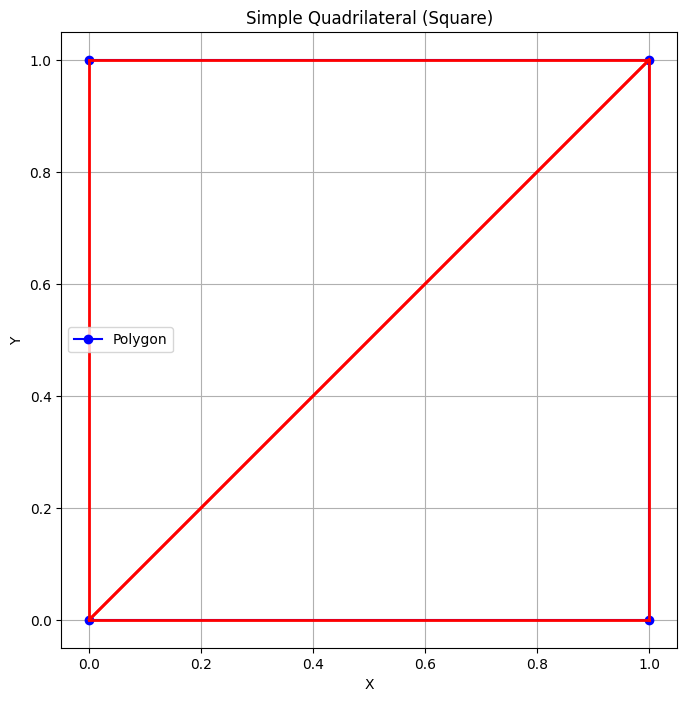

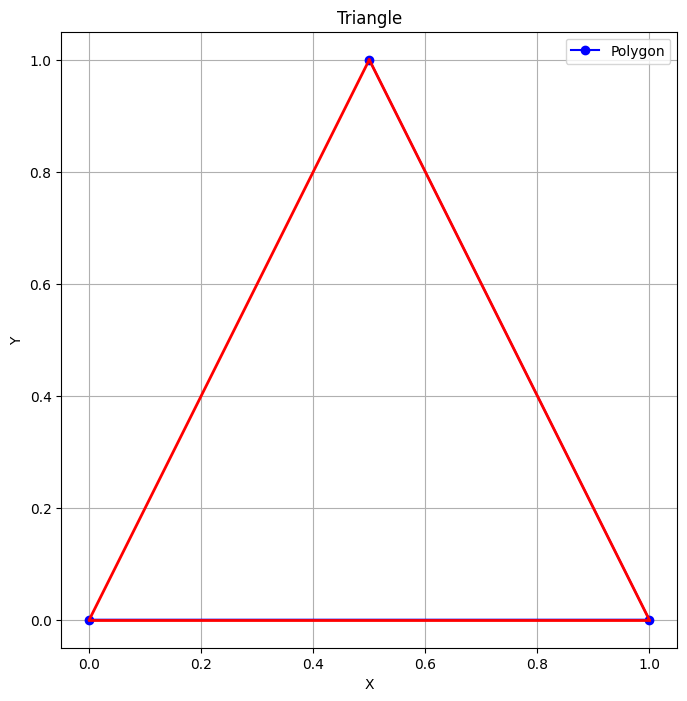

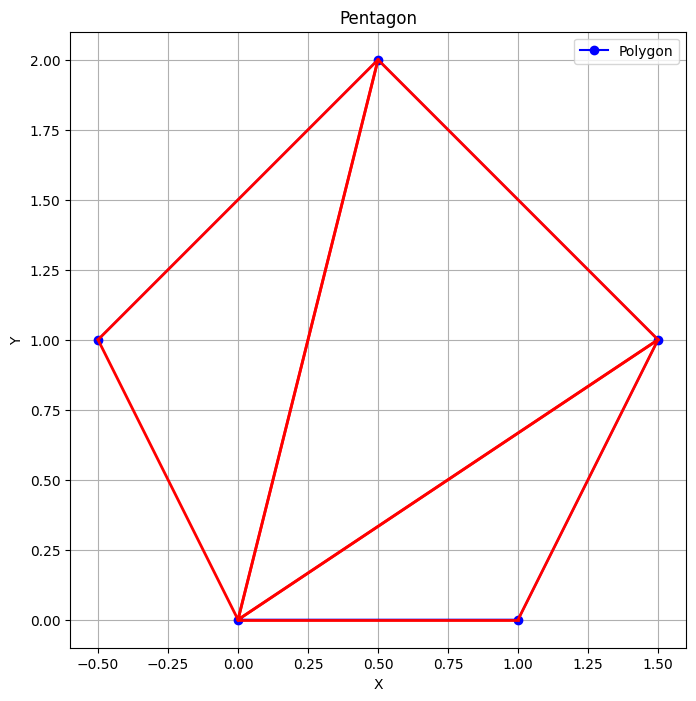

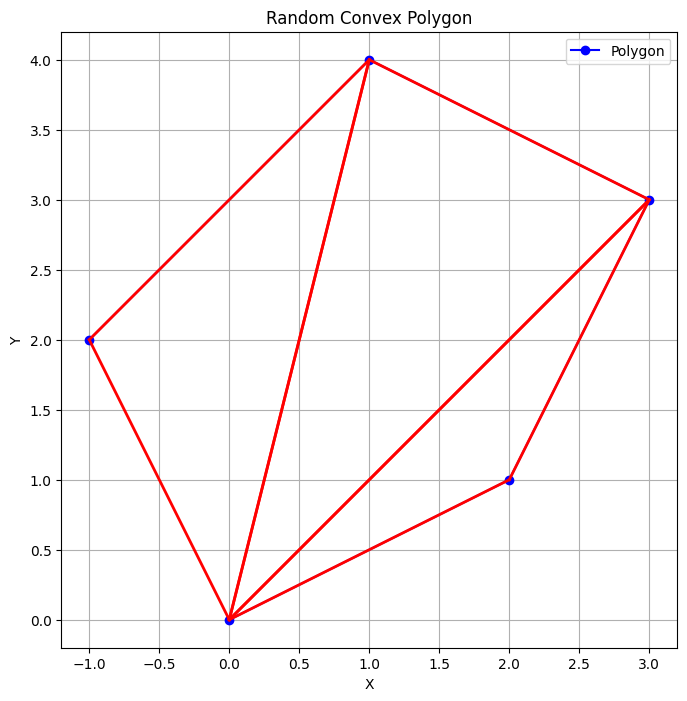

In [ ]:
# Step 1: Install the necessary libraries
!pip install triangle
import triangle
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the polygon and mesh
def plot_polygon_and_mesh(vertices, triangles, title):
    plt.figure(figsize=(8, 8))

    # Plotting the polygon
    plt.plot(vertices[:, 0], vertices[:, 1], 'bo-', label="Polygon")

    # Plotting the manually defined triangle mesh
    for simplex in triangles:
        pts = vertices[simplex]
        plt.plot([pts[0, 0], pts[1, 0]], [pts[0, 1], pts[1, 1]], 'r-', lw=2)
        plt.plot([pts[1, 0], pts[2, 0]], [pts[1, 1], pts[2, 1]], 'r-', lw=2)
        plt.plot([pts[2, 0], pts[0, 0]], [pts[2, 1], pts[0, 1]], 'r-', lw=2)

    # Customize the plot
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Example 1: Simple Quadrilateral (Square)
# Define vertices of a square
square_vertices = np.array([
    [0, 0],   # Vertex 1
    [1, 0],   # Vertex 2
    [1, 1],   # Vertex 3
    [0, 1]    # Vertex 4
])

# Define the two triangles manually
square_triangles = np.array([
    [0, 1, 2],  # Triangle 1
    [2, 3, 0]   # Triangle 2
])

plot_polygon_and_mesh(square_vertices, square_triangles, "Simple Quadrilateral (Square)")

# Example 2: Triangle
# Define vertices of a triangle
triangle_vertices = np.array([
    [0, 0],   # Vertex 1
    [1, 0],   # Vertex 2
    [0.5, 1]  # Vertex 3
])

# Since it's already a triangle, no need to divide it further
triangle_triangles = np.array([
    [0, 1, 2]  # Single Triangle
])

plot_polygon_and_mesh(triangle_vertices, triangle_triangles, "Triangle")

# Example 3: Pentagon
# Define vertices of a pentagon
pentagon_vertices = np.array([
    [0, 0],    # Vertex 1
    [1, 0],    # Vertex 2
    [1.5, 1],  # Vertex 3
    [0.5, 2],  # Vertex 4
    [-0.5, 1]  # Vertex 5
])

# Manually define triangles (dividing pentagon into triangles)
pentagon_triangles = np.array([
    [0, 1, 2],  # Triangle 1
    [0, 2, 3],  # Triangle 2
    [0, 3, 4]   # Triangle 3
])

plot_polygon_and_mesh(pentagon_vertices, pentagon_triangles, "Pentagon")

# Example 4: Random Convex Polygon
# Define vertices of a convex polygon (random shape)
random_polygon_vertices = np.array([
    [0, 0],   # Vertex 1
    [2, 1],   # Vertex 2
    [3, 3],   # Vertex 3
    [1, 4],   # Vertex 4
    [-1, 2]   # Vertex 5
])

# Manually define triangles (dividing the polygon into triangles)
random_polygon_triangles = np.array([
    [0, 1, 2],  # Triangle 1
    [2, 3, 0],  # Triangle 2
    [0, 3, 4]   # Triangle 3
])

plot_polygon_and_mesh(random_polygon_vertices, random_polygon_triangles, "Random Convex Polygon")


In [ ]:
class RedBlackTreeNode:
    def __init__(self, key, value, color='RED'):
        self.key = key
        self.value = value
        self.color = color
        self.left = None
        self.right = None
        self.parent = None

class RedBlackTree:
    def __init__(self):
        self.TNULL = RedBlackTreeNode(0, 0)  # Sentinel node for the leaves
        self.TNULL.color = 'BLACK'
        self.root = self.TNULL

    def insert(self, key, value):
        node = RedBlackTreeNode(key, value)
        node.parent = None
        node.key = key
        node.value = value
        node.left = self.TNULL
        node.right = self.TNULL
        node.color = 'RED'  # New nodes are always red

        # Perform binary search insertion
        parent = None
        current = self.root
        while current != self.TNULL:
            parent = current
            if node.key < current.key:
                current = current.left
            else:
                current = current.right

        node.parent = parent
        if parent is None:
            self.root = node
        elif node.key < parent.key:
            parent.left = node
        else:
            parent.right = node

        if node.parent is None:
            node.color = 'BLACK'
            return

        if node.parent.parent is None:
            return

        self.fix_insert(node)

    def fix_insert(self, k):
        while k.parent.color == 'RED':
            if k.parent == k.parent.parent.right:
                u = k.parent.parent.left
                if u.color == 'RED':
                    u.color = 'BLACK'
                    k.parent.color = 'BLACK'
                    k.parent.parent.color = 'RED'
                    k = k.parent.parent
                else:
                    if k == k.parent.left:
                        k = k.parent
                        self.right_rotate(k)
                    k.parent.color = 'BLACK'
                    k.parent.parent.color = 'RED'
                    self.left_rotate(k.parent.parent)
            else:
                u = k.parent.parent.right
                if u.color == 'RED':
                    u.color = 'BLACK'
                    k.parent.color = 'BLACK'
                    k.parent.parent.color = 'RED'
                    k = k.parent.parent
                else:
                    if k == k.parent.right:
                        k = k.parent
                        self.left_rotate(k)
                    k.parent.color = 'BLACK'
                    k.parent.parent.color = 'RED'
                    self.right_rotate(k.parent.parent)
            if k == self.root:
                break
        self.root.color = 'BLACK'

    def left_rotate(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.TNULL:
            y.left.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def right_rotate(self, x):
        y = x.left
        x.left = y.right
        if y.right != self.TNULL:
            y.right.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.right:
            x.parent.right = y
        else:
            x.parent.left = y
        y.right = x
        x.parent = y

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if node == self.TNULL or key == node.key:
            return node
        if key < node.key:
            return self._search(node.left, key)
        return self._search(node.right, key)

    def __getitem__(self, key):
        node = self.search(key)
        if node != self.TNULL:
            return node.value
        return None

    # For visualization and testing: Printing the tree structure
    def print_tree(self, node, indent="", position="Root"):
        if node != self.TNULL:
            print(f"{indent}[{position}] (Key: {node.key}, Value: {node.value}, Color: {node.color})")
            self.print_tree(node.left, indent + "    ", "Left")
            self.print_tree(node.right, indent + "    ", "Right")

# Example usage
if __name__ == "__main__":
    rbt = RedBlackTree()

    # Insert some nodes
    rbt.insert(10, "Value 10")
    rbt.insert(20, "Value 20")
    rbt.insert(15, "Value 15")
    rbt.insert(30, "Value 30")
    rbt.insert(25, "Value 25")

    # Print the tree structure
    print("Red-Black Tree Structure:")
    rbt.print_tree(rbt.root)

    # Search for a value
    print("\nSearching for key 15:")
    print(f"Found: {rbt[15]}")  # Should return "Value 15"

    print("\nSearching for key 30:")
    print(f"Found: {rbt[20]}")  # Should return None as 40 does not exist in the tree


Red-Black Tree Structure:
[Root] (Key: 15, Value: Value 15, Color: BLACK)
    [Left] (Key: 10, Value: Value 10, Color: BLACK)
    [Right] (Key: 25, Value: Value 25, Color: BLACK)
        [Left] (Key: 20, Value: Value 20, Color: RED)
        [Right] (Key: 30, Value: Value 30, Color: RED)

Searching for key 15:
Found: Value 15

Searching for key 30:
Found: Value 20
